In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [5]:
# Cargar los datos
customers  = pd.read_csv('df_Customers.csv')
order_items = pd.read_csv('df_Orderitems.csv')
payments = pd.read_csv('df_Payments.csv')
products = pd.read_csv('df_Products.csv')
orders = pd.read_csv('df_Orders.csv')

In [ ]:
# Unir los datasets
df = orders.merge(customers, on='customer_id', how='left')
df = df.merge(order_items, on='order_id', how='left')
df = df.merge(payments, on='order_id', how='left')
df = df.merge(products, on='product_id', how='left')

# Guardar el dataset final
df.to_csv('df_completo.csv', index=False)

In [11]:
#crear una copia del dataset integrado
df_completo = df.copy()

In [17]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529486 entries, 0 to 2529485
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   customer_id                    object 
 2   order_status                   object 
 3   order_purchase_timestamp       object 
 4   order_approved_at              object 
 5   order_delivered_timestamp      object 
 6   order_estimated_delivery_date  object 
 7   customer_zip_code_prefix       int64  
 8   customer_city                  object 
 9   customer_state                 object 
 10  product_id                     object 
 11  seller_id                      object 
 12  price                          float64
 13  shipping_charges               float64
 14  payment_sequential             int64  
 15  payment_type                   object 
 16  payment_installments           int64  
 17  payment_value                  float64
 18  pr

In [14]:
df_completo.describe()

,customer_zip_code_prefix,price,shipping_charges,payment_sequential,payment_installments,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,2.529486e+06,2.529486e+06,2.529486e+06,2.529486e+06,2.529486e+06,2.529486e+06,2.529289e+06,2.529289e+06,2.529289e+06,2.529289e+06
mean,4.030052e+04,5.474749e+02,4.273112e+01,1.112513e+00,2.839002e+00,2.828277e+02,1.868944e+03,3.093314e+01,1.588391e+01,2.490795e+01
std,3.118138e+04,9.386336e+02,3.706843e+01,8.949719e-01,2.613797e+00,3.638869e+02,2.651228e+03,1.388163e+01,1.025106e+01,1.061396e+01
min,1.003000e+03,8.500000e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,6.000000e+00
25%,9.660000e+03,7.180000e+01,1.840000e+01,1.000000e+00,1.000000e+00,8.203000e+01,3.500000e+02,2.000000e+01,1.000000e+01,1.600000e+01
50%,3.524200e+04,1.537500e+02,3.391000e+01,1.000000e+00,2.000000e+00,1.743600e+02,1.350000e+03,3.000000e+01,1.200000e+01,2.100000e+01
75%,6.908600e+04,5.176500e+02,5.442000e+01,1.000000e+00,4.000000e+00,3.260900e+02,1.750000e+03,4.000000e+01,2.200000e+01,3.000000e+01
max,9.999000e+04,6.735000e+03,4.096800e+02,2.900000e+01,2.400000e+01,7.274880e+03,4.042500e+04,1.050000e+02,1.050000e+02,1.180000e+02


In [15]:
df_completo.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
1,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
2,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
3,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
4,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
5,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
6,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
7,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
8,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
9,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0


In [16]:
# muestrame las ordenes id que se repiten sin modificar el dataset
dupplicates = df_completo[df_completo.duplicated(subset='order_id', keep=False)]
print(dupplicates[['order_id', 'customer_id']].drop_duplicates())


             order_id   customer_id
0        Axfy13Hk4PIk  hCT0x9JiGXBQ
13       v6px92oS8cLG  PxA7fv9spyhx
16       Ulpf9skrhjfm  g3nXeJkGI0Qw
21       bwJVWupf2keN  EOEsCQ6QlpIg
27       Dd0QnrMk9Cj5  mVz5LO2Vd6cL
...               ...           ...
2529149  CvmOjV9j9VSg  zugAtlsSO6Y5
2529161  38OHMkF8Cxi7  xJEzC2usouPl
2529166  IlTAoIkILwrq  4hjsCpj6FC7g
2529169  uA6oXfftGVmT  DLn56oKHl9bv
2529375  v3QtU6xlGDJp  auSfRYUQUOIq

[74661 rows x 2 columns]


In [19]:
print(df_completo.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm'],
      dtype='object')


In [23]:
# Sumar la cantidad de productos por cada combinación de order_id, product_id y customer_id
df_completo['order_item_quantity'] = df_completo.groupby(['order_id', 'product_id', 'customer_id'])['product_id'].transform('count')


In [ ]:
df_completo.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_quantity
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,13
1,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,13
2,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,13
3,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,13
4,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,13
5,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,13
6,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,13
7,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,13
8,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,13
9,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,...,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,13


In [ ]:
# agrupar las mismas ordenes de compra,dejando los datos de los productos y sumando las cantidades y precios  
df_completo = df_completo.groupby('order_id').agg({
    'customer_id': 'first',
    'order_purchase_timestamp': 'first', # Cambia aquí si es necesario
    'product_id': lambda x: list(x),
    'order_item_quantity': 'sum',          # Cambia aquí si es necesario
    'price': 'sum',
    'payment_type': 'first'
}).reset_index()

KeyError: "Column(s) ['customer_city', 'customer_state', 'payment_value', 'product_category_name'] do not exist"

In [27]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  89316 non-null  object 
 1   customer_id               89316 non-null  object 
 2   order_purchase_timestamp  89316 non-null  object 
 3   product_id                89316 non-null  object 
 4   order_item_quantity       89316 non-null  int64  
 5   product_weight_g          89316 non-null  float64
 6   shipping_charges          89316 non-null  float64
 7   price                     89316 non-null  float64
 8   payment_type              89316 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.1+ MB


In [32]:
# arreglando el desastre
# utilizo la copia del dataset integrado para hacer el groupby, esa ya tiene añadida la cantidad de items por orden
#  agrupar las mismas ordenes de compra,dejando los datos de los productos y sumando las cantidades y precios  
df= df.groupby('order_id').agg({
    'customer_id': 'first',
    'order_purchase_timestamp': 'first', 
    'order_estimated_delivery_date': 'first',
    'order_status': 'first',
    'product_id': lambda x: list(x),
    'customer_city': 'first',
    'customer_state': 'first',
    'payment_value': 'sum',
    'product_category_name': lambda x: list(x),
    'order_item_quantity': 'sum',          
    'payment_type': 'first',
    'order_approved_at': 'first'
}).reset_index()

In [44]:
df.head(10)

,order_id,customer_id,order_purchase_timestamp,order_estimated_delivery_date,order_status,product_id,customer_city,customer_state,payment_value,product_category_name,order_item_quantity,payment_type,order_approved_at,mes_compra
0,001gkk6BwKEB,xKv2nBFnvcwS,2018-04-16 14:01:44,2018-05-03,delivered,iT2Xu6xubpJH,sao paulo,SP,797.70,toys,9,credit_card,2018-04-16 14:32:36,4
1,0029bAIZFMKA,Xcm6u682SuQQ,2018-02-17 15:04:06,2018-03-15,delivered,nLIlaBtSSOpZ,londrina,PR,871.28,telephony,16,wallet,2018-02-20 07:06:53,2
2,002Jk8hp9Bhy,l0HoYdeR1BJM,2018-04-24 09:27:39,2018-05-17,delivered,3H7nJ3Wp12et,itaquaquecetuba,SP,89093.20,toys,4900,wallet,2018-04-25 03:51:36,4
3,002ohHsWSKrP,z5refCsXE1nS,2018-05-17 17:09:33,2018-05-25,delivered,5LRdY9AiWfVJ,guarulhos,SP,3903.90,toys,36,credit_card,2018-05-17 20:32:27,5
4,0041NijdAYB0,XMxGRoDyISTv,2018-07-10 10:32:53,2018-08-01,delivered,gq42NYmDYSH7,aracaju,SE,281.36,toys,16,credit_card,2018-07-10 10:45:39,7
5,007kNCWr6IoE,fUtsGs8V2lWc,2018-06-15 10:19:26,2018-07-19,delivered,Jr6xa51c0uMm,salvador,BA,1836.36,housewares,36,credit_card,2018-06-15 10:40:01,6
6,00C1YjVT8IOW,BfANDnn4ZrCo,2018-08-23 12:49:42,2018-09-04,delivered,Lacsk9o17nBx,maua,SP,671.25,toys,1,credit_card,2018-08-23 13:24:57,8
7,00Dwp46qI5I4,MuRyOV1srhJI,2018-01-07 12:39:20,2018-02-07,delivered,SiMrD16uIYxG,porto alegre,RS,827.04,computers_accessories,16,debit_card,2018-01-07 12:47:41,1
8,00IT5KCtKVtt,FbppTmBd8DaN,2018-08-21 14:44:23,2018-09-21,delivered,KkDoiScDXpff,embu-guacu,SP,370.06,toys,4,credit_card,2018-08-21 14:55:14,8
9,00IkpnpwGtki,bd9nnwwNqTMu,2017-08-21 18:36:21,2017-09-06,delivered,cgARPNg5NH6X,santos,SP,2801.82,cool_stuff,36,credit_card,2017-08-21 18:50:19,8


In [35]:
# si el producto es el mismo, quita la lista y deja solo el nombre del producto
df['product_id'] = df['product_id'].apply(lambda x: x[0] if isinstance(x, list) else x)
# si el producto es el mismo, quita la lista y deja solo el nombre del producto
df['product_category_name'] = df['product_category_name'].apply(lambda x: x[0] if isinstance(x, list) else x)




In [36]:
df.head()

,order_id,customer_id,order_purchase_timestamp,order_estimated_delivery_date,order_status,product_id,customer_city,customer_state,payment_value,product_category_name,order_item_quantity,payment_type,order_approved_at
0,001gkk6BwKEB,xKv2nBFnvcwS,2018-04-16 14:01:44,2018-05-03,delivered,iT2Xu6xubpJH,sao paulo,SP,797.70,toys,9,credit_card,2018-04-16 14:32:36
1,0029bAIZFMKA,Xcm6u682SuQQ,2018-02-17 15:04:06,2018-03-15,delivered,nLIlaBtSSOpZ,londrina,PR,871.28,telephony,16,wallet,2018-02-20 07:06:53
2,002Jk8hp9Bhy,l0HoYdeR1BJM,2018-04-24 09:27:39,2018-05-17,delivered,3H7nJ3Wp12et,itaquaquecetuba,SP,89093.20,toys,4900,wallet,2018-04-25 03:51:36
3,002ohHsWSKrP,z5refCsXE1nS,2018-05-17 17:09:33,2018-05-25,delivered,5LRdY9AiWfVJ,guarulhos,SP,3903.90,toys,36,credit_card,2018-05-17 20:32:27
4,0041NijdAYB0,XMxGRoDyISTv,2018-07-10 10:32:53,2018-08-01,delivered,gq42NYmDYSH7,aracaju,SE,281.36,toys,16,credit_card,2018-07-10 10:45:39


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       89316 non-null  object 
 1   customer_id                    89316 non-null  object 
 2   order_purchase_timestamp       89316 non-null  object 
 3   order_estimated_delivery_date  89316 non-null  object 
 4   order_status                   89316 non-null  object 
 5   product_id                     89316 non-null  object 
 6   customer_city                  89316 non-null  object 
 7   customer_state                 89316 non-null  object 
 8   payment_value                  89316 non-null  float64
 9   product_category_name          89008 non-null  object 
 10  order_item_quantity            89316 non-null  int64  
 11  payment_type                   89316 non-null  object 
 12  order_approved_at              89307 non-null 

#### cambiando a valores numericos los datos importantes

In [41]:
# Extraer el mes de la compra para hacer el analisis por mes
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['mes_compra'] = df['order_purchase_timestamp'].dt.month

In [43]:
# muestrame la columna de mes de compra
df['mes_compra'].head(20)

0      4
1      2
2      4
3      5
4      7
5      6
6      8
7      1
8      8
9      8
10     5
11    11
12     9
13     3
14     4
15    10
16    12
17     6
18     5
19     1
Name: mes_compra, dtype: int32

In [47]:
# Asignar un número único a cada ciudad donde compran los clientes
df['customer_city_num'], codigos_ciudades = pd.factorize(df['customer_city'])

# Si quieres ver el mapeo de número a nombre de ciudad:
mapa_ciudades = dict(enumerate(codigos_ciudades))
print(mapa_ciudades)

{0: 'sao paulo', 1: 'londrina', 2: 'itaquaquecetuba', 3: 'guarulhos', 4: 'aracaju', 5: 'salvador', 6: 'maua', 7: 'porto alegre', 8: 'embu-guacu', 9: 'santos', 10: 'ribeirao preto', 11: 'osasco', 12: 'juquitiba', 13: 'rio de janeiro', 14: 'campo grande', 15: 'contagem', 16: 'garibaldi', 17: 'campinas', 18: 'belo horizonte', 19: 'sao jose do rio preto', 20: 'juiz de fora', 21: 'natal', 22: 'serra', 23: 'blumenau', 24: 'bauru', 25: 'santa maria', 26: 'indaiatuba', 27: 'maceio', 28: 'colatina', 29: 'jaboticabal', 30: 'jatai', 31: 'amparo', 32: 'sao vicente', 33: 'santa rita do sapucai', 34: 'aparecida', 35: 'sumare', 36: 'niteroi', 37: 'uba', 38: 'brasilia', 39: 'pelotas', 40: 'porto lucena', 41: 'guaira', 42: 'cachoeirinha', 43: 'bastos', 44: 'ibicoara', 45: 'fervedouro', 46: 'cacapava', 47: 'itapema', 48: 'montes claros', 49: 'sao bernardo do campo', 50: 'lorena', 51: 'alcobaca', 52: 'goiania', 53: 'ribeirao pires', 54: 'caririacu', 55: 'diadema', 56: 'ico', 57: 'erebango', 58: 'floriano

In [52]:
# Asignar un número único a cada tipo de método de pago
df['payment_type'], codigos_payment = pd.factorize(df['payment_type'])

# Si quieres ver el mapeo de número a nombre de método de pago:
mapa_payment = dict(enumerate(codigos_payment))
print(mapa_payment)

{0: 'credit_card', 1: 'wallet', 2: 'debit_card', 3: 'voucher'}


In [57]:
# aiganr valor numerico a customer_state
df['customer_state_num'], codigos_estado = pd.factorize(df['customer_state'])
# Si quieres ver el mapeo de número a nombre de estado:
mapa_estado = dict(enumerate(codigos_estado))
print(mapa_estado)

{0: 'SP', 1: 'PR', 2: 'SE', 3: 'BA', 4: 'RS', 5: 'RJ', 6: 'MS', 7: 'MG', 8: 'RN', 9: 'ES', 10: 'SC', 11: 'AL', 12: 'GO', 13: 'DF', 14: 'CE', 15: 'MA', 16: 'PE', 17: 'MT', 18: 'RO', 19: 'PA', 20: 'PB', 21: 'AM', 22: 'AC', 23: 'PI', 24: 'TO', 25: 'AP', 26: 'RR'}


In [55]:
# order_status es una variable categorica, la voy a transformar en numerica
df['order_status_num'], codigos_order_status = pd.factorize(df['order_status'])
# Si quieres ver el mapeo de número a nombre de estado de orden:
mapa_order_status = dict(enumerate(codigos_order_status))
print(mapa_order_status)

{0: 'delivered', 1: 'processing', 2: 'shipped', 3: 'canceled', 4: 'invoiced', 5: 'approved', 6: 'unavailable'}


In [45]:
# Asignando un número único a cada tipo de producto
df['product_category_num'], codigos_productos = pd.factorize(df['product_category_name'])

# Si quieres ver el mapeo de número a nombre de producto:
mapa_productos = dict(enumerate(codigos_productos))
print(mapa_productos)

{0: 'toys', 1: 'telephony', 2: 'housewares', 3: 'computers_accessories', 4: 'cool_stuff', 5: 'watches_gifts', 6: 'office_furniture', 7: 'bed_bath_table', 8: 'electronics', 9: 'stationery', 10: 'auto', 11: 'health_beauty', 12: 'garden_tools', 13: 'construction_tools_construction', 14: 'market_place', 15: 'furniture_decor', 16: 'perfumery', 17: 'baby', 18: 'audio', 19: 'food', 20: 'sports_leisure', 21: 'fashion_shoes', 22: 'pet_shop', 23: 'home_appliances_2', 24: 'home_appliances', 25: 'books_technical', 26: 'furniture_living_room', 27: 'computers', 28: 'home_construction', 29: 'agro_industry_and_commerce', 30: 'books_general_interest', 31: 'fashion_bags_accessories', 32: 'consoles_games', 33: 'home_confort', 34: 'food_drink', 35: 'small_appliances_home_oven_and_coffee', 36: 'air_conditioning', 37: 'music', 38: 'luggage_accessories', 39: 'drinks', 40: 'industry_commerce_and_business', 41: 'costruction_tools_garden', 42: 'construction_tools_safety', 43: 'christmas_supplies', 44: 'small_ap

In [60]:
#verificar valores nulos
print(df.isnull().sum())


order_id                           0
customer_id                        0
order_purchase_timestamp           0
order_estimated_delivery_date      0
order_status                       0
product_id                         0
customer_city                      0
customer_state                     0
payment_value                      0
product_category_name            308
order_item_quantity                0
payment_type                       0
order_approved_at                  9
mes_compra                         0
product_category_num               0
customer_city_num                  0
order_status_num                   0
customer_state_num                 0
dtype: int64


In [61]:
# Reemplazar los valores nulos en product_category_name con 'desconocido' y asignar un número único a cada categoría de producto
df['product_category_name'] = df['product_category_name'].fillna('desconocido')
# Asignar un número (70) a 'desconcido' en product_category_num
df.loc[df['product_category_name'] == 'desconocido', 'product_category_num'] = 70


In [62]:
print(df.isnull().sum())

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_estimated_delivery_date    0
order_status                     0
product_id                       0
customer_city                    0
customer_state                   0
payment_value                    0
product_category_name            0
order_item_quantity              0
payment_type                     0
order_approved_at                9
mes_compra                       0
product_category_num             0
customer_city_num                0
order_status_num                 0
customer_state_num               0
dtype: int64


### PCA

In [58]:
# columnas de df
print(df.columns)

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'order_status', 'product_id',
       'customer_city', 'customer_state', 'payment_value',
       'product_category_name', 'order_item_quantity', 'payment_type',
       'order_approved_at', 'mes_compra', 'product_category_num',
       'customer_city_num', 'order_status_num', 'customer_state_num'],
      dtype='object')


##### 1.Seleccionando variables y estandarizando

In [64]:
# seleccionando las variables numericas para el PCA
features = ['customer_state_num','customer_city_num', 'mes_compra', 'order_item_quantity','payment_value' ,'product_category_num', 'payment_type']

In [65]:
# variable independiente y dependiente
# recuerda que la dependiente es la que quieres predecir

X = df[features] #independiente
y = df['order_status_num']  # dependiente


In [66]:
# estadarizando caracteristicas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
# Crear DataFrame estandarizado
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [71]:
# Aplicar PCA
pca = PCA(0.95)
pca.fit(X_scaled_df)
#quiero saber el numero de componentes principales
n_components = pca.n_components_
print(f"\nNúmero de componentes principales: {n_components}")




Número de componentes principales: 7


In [ ]:
# Convertir a DataFrame
df_pca = pca.transform(X_scaled_df)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

ValueError: Shape of passed values is (89316, 7), indices imply (89316, 6)

Varianza explicada por cada componente: [0.22175568 0.17571894 0.14455912 0.14232133 0.14109097 0.11004629
 0.06450766]


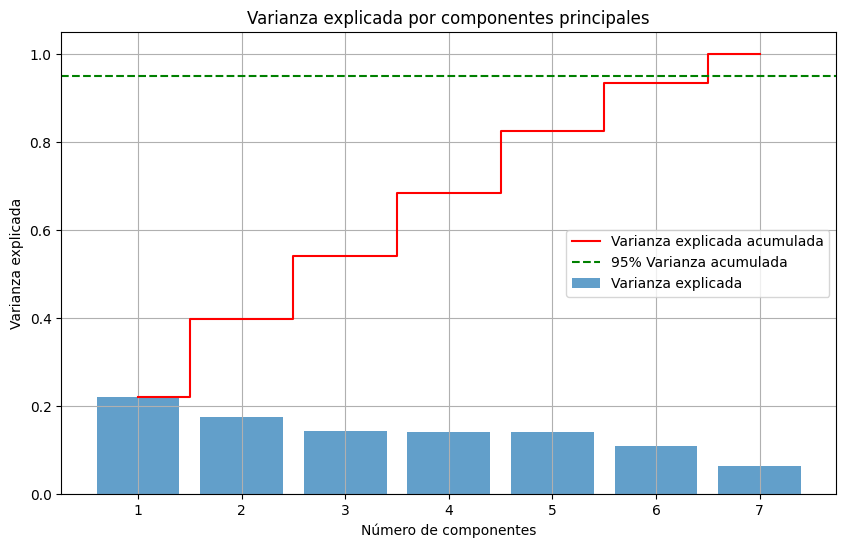

Varianza explicada para los primeros 6 componentes: 0.94


In [79]:
#varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

#varinan explicada acumulada
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

print(f"Varianza explicada por cada componente: {varianza_explicada}")
#visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, label='Varianza explicada')
plt.step(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, where='mid', color='red', label='Varianza explicada acumulada')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Varianza acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada por componentes principales')
plt.legend()
plt.grid(True)
plt.show()

# varianza explicada de los primeros 2 componentes
print(f"Varianza explicada para los primeros 6 componentes: {sum(varianza_explicada[:6]):.2f}")


In [87]:
# componentes principales
print(pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']))

     customer_state_num  customer_city_num  mes_compra  order_item_quantity  \
PC1            0.025833           0.017757    0.019736             0.704877   
PC2            0.705301           0.704851   -0.019630            -0.022254   
PC3            0.004392          -0.048501    0.621211            -0.026620   
PC4            0.042835           0.044361    0.595228            -0.008325   
PC5            0.015700          -0.011067    0.507656             0.036546   
PC6            0.706952          -0.705993   -0.032312            -0.004758   
PC7            0.001060          -0.000999   -0.016345             0.707472   

     payment_value  product_category_num  payment_type  
PC1       0.703768             -0.080191      0.007454  
PC2      -0.021995             -0.016149     -0.064112  
PC3      -0.053006             -0.601731     -0.496112  
PC4      -0.024684             -0.045372      0.799477  
PC5       0.042734              0.793015     -0.331483  
PC6      -0.001838       

#### CLUSTERING

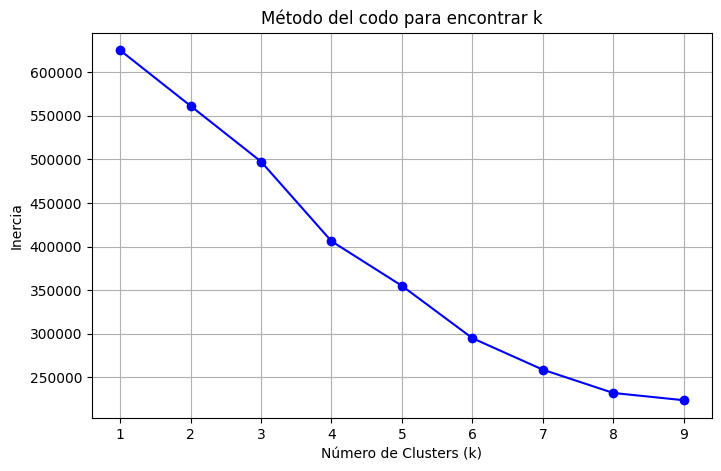

In [81]:
# Determinar número óptimo de clusters (método del codo)
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(8,5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar k')
plt.grid(True)
plt.show()

In [88]:
# Ajustar K-Means con k óptimo (ej. k=4)
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_pca)

# Añadir clusters al DataFrame original
df['cluster'] = clusters

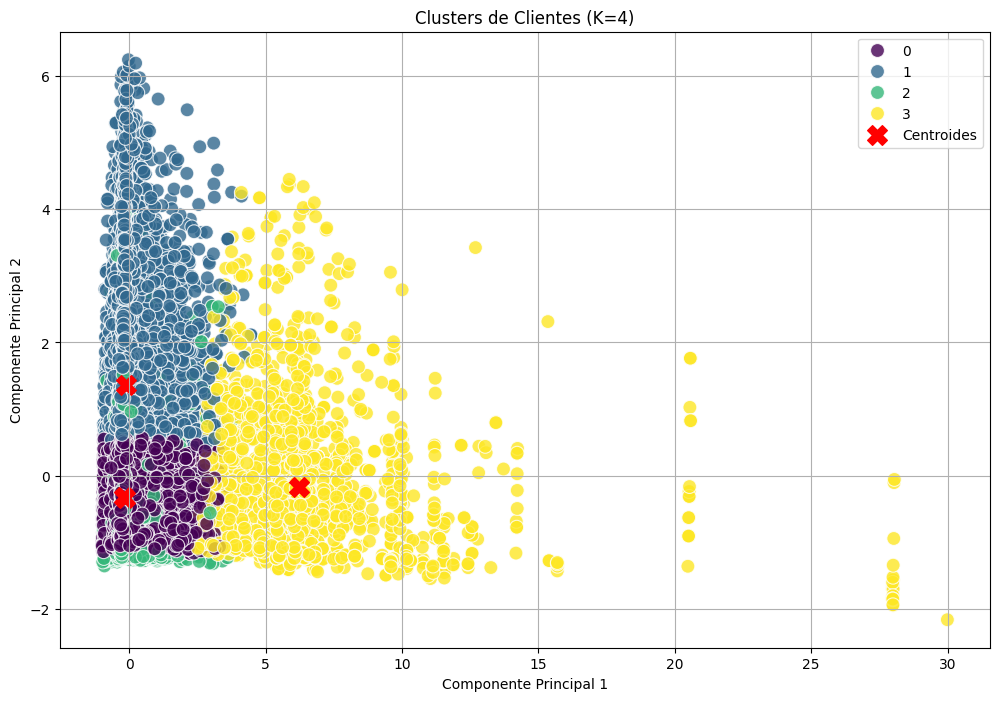

In [91]:
# Reducción a 2D para visualización
pca1 = PCA(n_components=2)
X_pca1 = pca1.fit_transform(X_scaled)

# Crear DataFrame para visualización
results_df = pd.DataFrame(X_pca1, columns=['PC1', 'PC2'])
results_df['Cluster'] = df['cluster']  # Usa la columna cluster ya creada
results_df['order_status_num'] = df['order_status_num'].values

# Obtener los centroides en el espacio 2D
centroids = pca1.transform(KMeans(n_clusters=4, random_state=42).fit(X_scaled).cluster_centers_)

# Graficar clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster',
                palette='viridis', data=results_df,
                s=100, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='X', s=200, c='red', label='Centroides')
plt.title('Clusters de Clientes (K=4)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# analizar caracteristicas de los clusters
for i in range(k_optimo):
    cluster_data = df[df['cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Cantidad de clientes: {len(cluster_data)}")
    print(f"Estado más común: {cluster_data['customer_state'].mode()[0]}")
    print(f"Ciudad más común: {cluster_data['customer_city'].mode()[0]}")
    print(f"Pago promedio: {cluster_data['payment_value'].mean():.2f}")
    print(f"Cantidad promedio de productos por orden: {cluster_data['order_item_quantity'].mean():.2f}")
    print(f"Categoría de producto más común: {cluster_data['product_category_name'].mode()[0]}")


Cluster 0:
Cantidad de clientes: 61857
Estado más común: SP
Ciudad más común: sao paulo
Pago promedio: 4649.53
Cantidad promedio de productos por orden: 1577.24
Categoría de producto más común: toys

Cluster 1:
Cantidad de clientes: 19068
Estado más común: MG
Ciudad más común: brasilia
Pago promedio: 5187.81
Cantidad promedio de productos por orden: 1949.65
Categoría de producto más común: toys

Cluster 2:
Cantidad de clientes: 5987
Estado más común: SP
Ciudad más común: sao paulo
Pago promedio: 4779.12
Cantidad promedio de productos por orden: 1534.09
Categoría de producto más común: toys

Cluster 3:
Cantidad de clientes: 2404
Estado más común: SP
Ciudad más común: sao paulo
Pago promedio: 124903.99
Cantidad promedio de productos por orden: 116264.13
Categoría de producto más común: toys


*Cluster 0: El Cliente Estándar de São Paulo*

    Interpretación: Este es tu segmento principal o base de clientes. Son la mayoría de tus compradores, concentrados en el principal centro económico, São Paulo. Su comportamiento de compra, aunque elevado en números absolutos, probablemente representa el "promedio" para tu negocio. Este es el grupo que define la normalidad en tus datos.

*Cluster 1: El Comprador de Alto Valor de Fuera de SP*

    Interpretación: Este segmento es muy interesante. Aunque es más pequeño que el Cluster 0, sus miembros gastan y compran en mayor cantidad en promedio. Están geográficamente concentrados en otras regiones importantes. Podrían ser clientes con mayor poder adquisitivo o pequeñas empresas de estas regiones que compran para revender. La estrategia para ellos debería ser diferente a la del cliente de SP.

*Cluster 2: El Cliente Secundario de São Paulo*

    Interpretación: K-Means separó a este grupo del Cluster 0 por alguna razón. Aunque las medias son similares, los Componentes Principales (PCA) deben haber detectado una diferencia sutil. Podría ser que estos clientes:
        * Usan un tipo de pago diferente (capturado por PC4).
        * Compran en una época del año distinta (capturado por PC3, PC4, PC5).
        * Su estrategia de "cantidad vs. precio" es diferente (capturado por PC7).
        * Son un subsegmento de São Paulo que merece una investigación más profunda para entender qué los hace distintos del grupo principal.

*Cluster 3 (o Cluster de Outliers): El Cliente Mayorista / Power Buyer*

    Interpretación: ¡Este es el hallazgo más importante de tu análisis! Este no es un cliente consumidor final. Los valores son tan astronómicamente altos que claramente se trata de un cliente B2B (Business-to-Business), un revendedor, distribuidor o una gran institución.

    Implicación de Negocio: Este segmento, aunque pequeño en número de clientes, es críticamente valioso en términos de ingresos. Deben ser gestionados por un equipo de cuentas clave, no a través de marketing masivo. La compra masiva de "juguetes" sugiere que podría ser una gran cadena de jugueterías o un distribuidor mayorista que se abastece a través de tu plataforma.


